# Hands-on Machine Learning with Python Prt-3
> **iris Dataset**

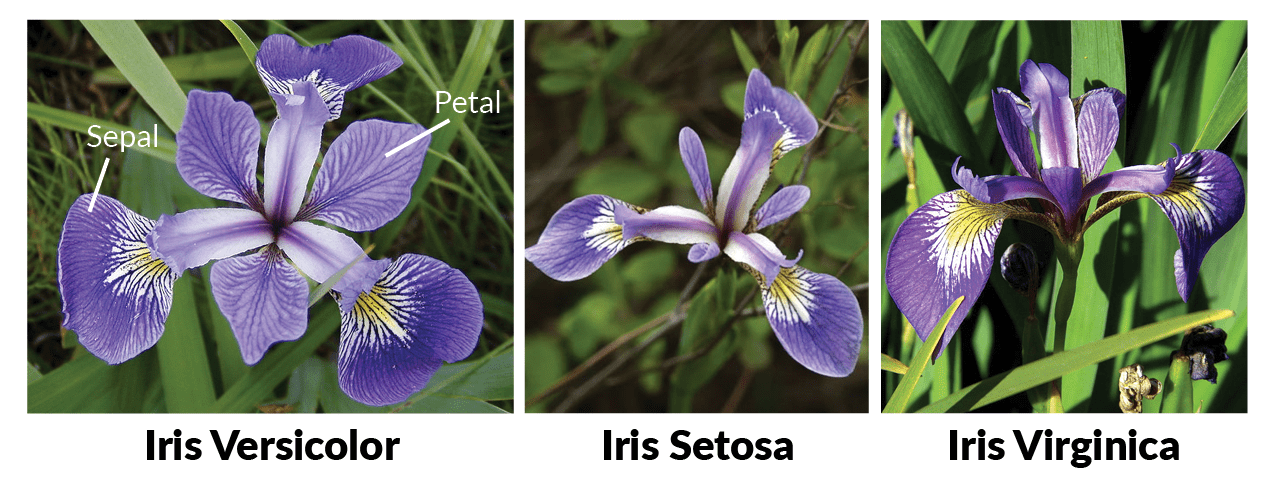

In [27]:
from IPython.display import Image
#image_path = '/kaggle/input/iris-images/iris_single.jpg'
#image_path = '/kaggle/input/iris-images/iris_all_flowers.png' 
image_path = '/kaggle/input/iris-images/iris-all.png' 
Image(filename=image_path)

In [28]:
import warnings
warnings.filterwarnings("ignore")

# Import necessary libraries

In [29]:
# Essentials- Numerical Calculation and Data Manupulation libraries
import numpy as np
import pandas as pd
# Data Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sb
#Data preprocessing libraries
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.decomposition import PCA
#ML Models libraries  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
#Ensemble Models  libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.pipeline import make_pipeline
#Model Evaluation libraries
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.metrics import roc_curve, auc

In [30]:
df = pd.read_csv('/kaggle/input/iris-dataset/iris_1.csv')
#iris

In [31]:
from sklearn.datasets import load_iris
# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
# Create a DataFrame for EDA (Exploratory Data Analysis)
#df = pd.DataFrame(data=np.c_[X, y], columns=iris.feature_names + ['target'])
#df.head()
#df.to_csv('iris.csv', index=False)

# EDA (Exploratory Data Analysis)

In [32]:
print("Head of the dataset:")
df.head(2)

Head of the dataset:


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


In [33]:
print(df.shape)

(150, 5)


In [34]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


In [35]:
df['species'].unique()
df['species'].unique().tolist()

['setosa', 'versicolor', 'virginica']

In [36]:
# EDA
print("\n Descriptive statistics:")
print(df.describe())


 Descriptive statistics:
       sepal_length  sepal_width  petal_length  petal_width
count    150.000000   150.000000    150.000000   150.000000
mean       5.843333     3.057333      3.758000     1.199333
std        0.828066     0.435866      1.765298     0.762238
min        4.300000     2.000000      1.000000     0.100000
25%        5.100000     2.800000      1.600000     0.300000
50%        5.800000     3.000000      4.350000     1.300000
75%        6.400000     3.300000      5.100000     1.800000
max        7.900000     4.400000      6.900000     2.500000


In [37]:
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

# Data Visualization

<Axes: xlabel='species', ylabel='count'>

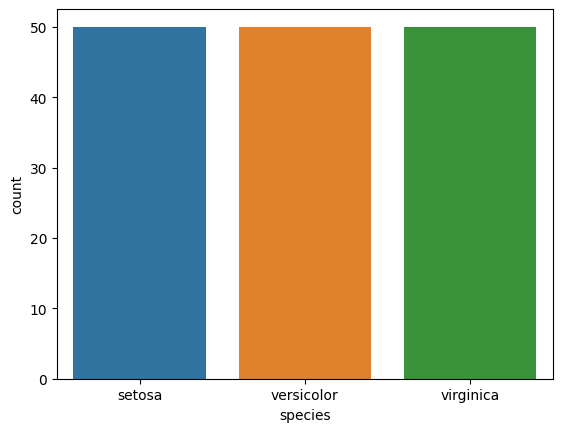

In [38]:
sb.countplot(x='species',data=df)

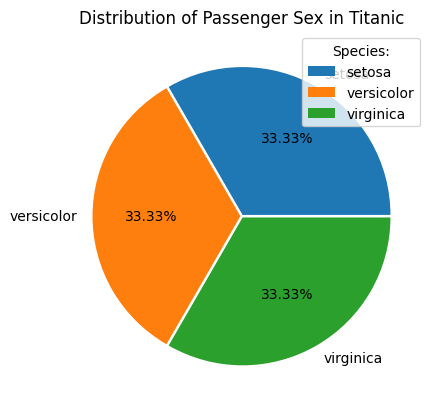

In [39]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

y = df['species'].value_counts().tolist()
mylabels = df['species'].unique().tolist()
myexplode = [0.01, 0.01, 0.01]

plt.pie(y, labels = mylabels,autopct='%1.2f%%', explode = myexplode)
plt.legend(title = "Species:")
plt.title('Distribution of Passenger Sex in Titanic')

plt.show() 

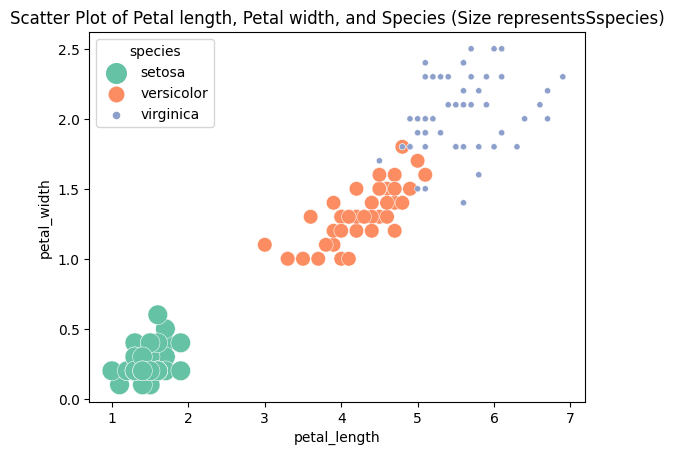

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot with color representing 'Survived' and size representing 'Pclass'

#sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=df, palette='Set2')
#sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', size='species', data=df, palette='Set2', sizes=(20, 200))

#sns.scatterplot(x='petal_length', y='petal_width', hue='species',  data=df, palette='Set2')
sns.scatterplot(x='petal_length', y='petal_width', hue='species', size='species', data=df, palette='Set2', sizes=(20, 200))

plt.title('Scatter Plot of Petal length, Petal width, and Species (Size representsSspecies)')
plt.show()


<Axes: xlabel='species', ylabel='petal_length'>

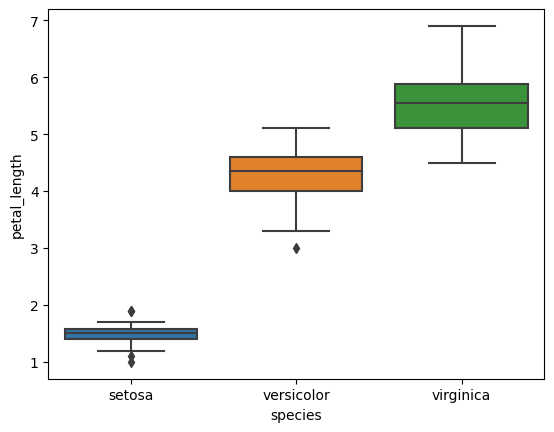

In [41]:
sb.boxplot(x='species',y='petal_length', data=df)
#sb.boxplot(x='species',y='petal_width', data=df)

<Axes: xlabel='species', ylabel='sepal_length'>

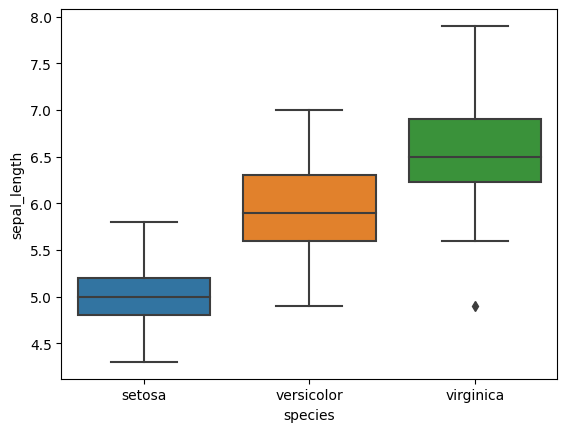

In [42]:
#sb.boxplot(x='species',y='sepal_width', data=df)
sb.boxplot(x='species',y='sepal_length', data=df)

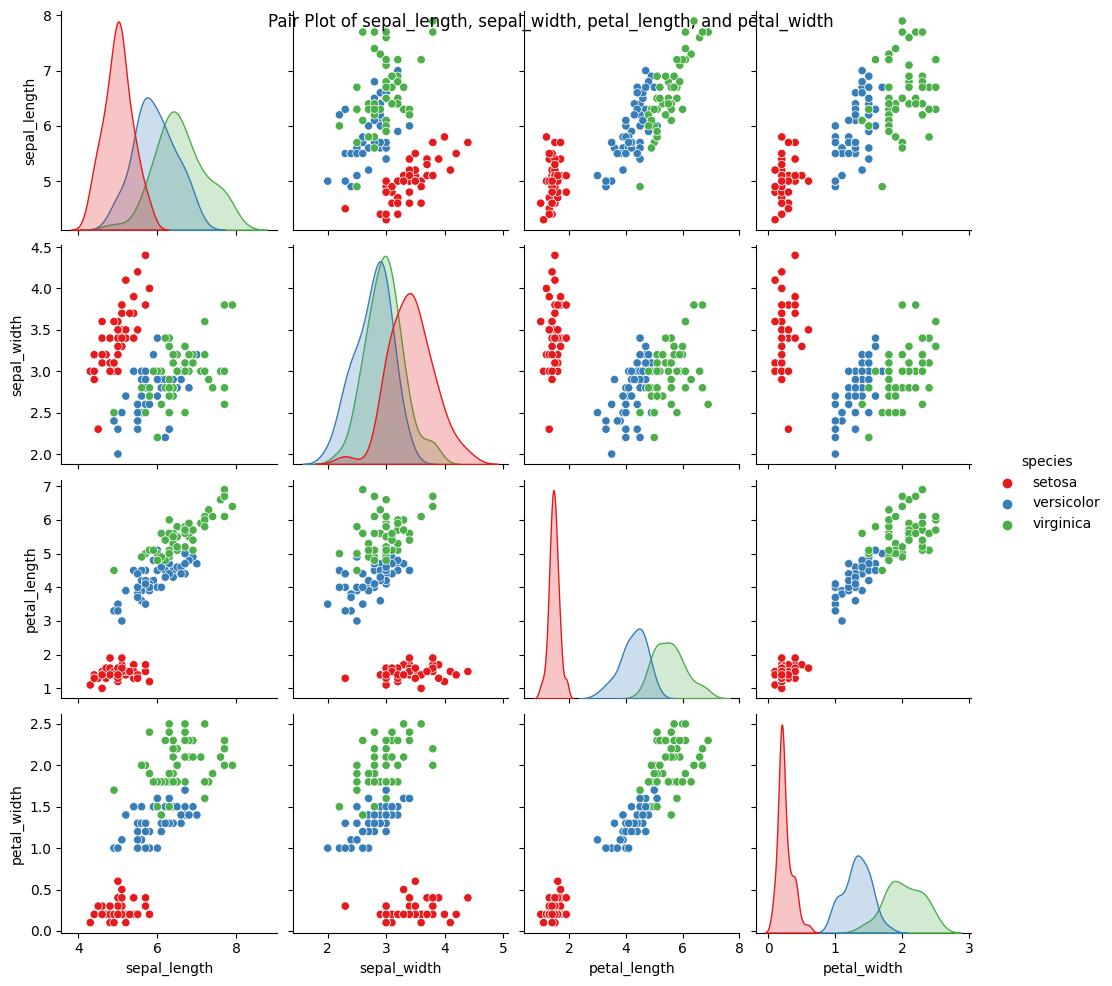

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns_to_visualize = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width','species']

# Pair plot of selected columns
sns.pairplot(df[columns_to_visualize], hue='species', palette='Set1')
plt.suptitle('Pair Plot of sepal_length, sepal_width, petal_length, and petal_width')
plt.show()

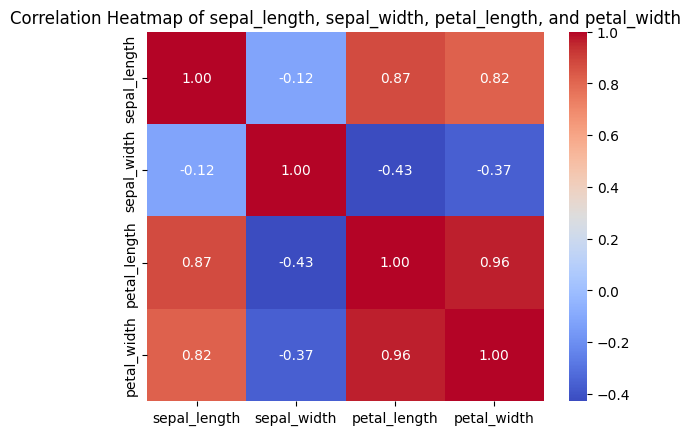

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
columns_to_visualize = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']

# Calculate correlation matrix
correlation_matrix = df[columns_to_visualize].corr()

# Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of sepal_length, sepal_width, petal_length, and petal_width')
plt.show()


# Data Pre-processing

> **Dividing into Feature Matrix and Feature Vector**

In [45]:
#Feature Matrix
X=df.drop('species',axis=1) 
#Feature Vector
y=df['species']

print(X.head())
print(y.head())

   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object


> **Feature Engineering**

In [46]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
#df.species = le.fit_transform(df.species) 
y=le.fit_transform(df.species) 
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

> **Dada Transformation or Normalization** 

> *Feature Scaling : Standarization*

In [47]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
scaler = MinMaxScaler()
#X = scaler.fit_transform(X)
#print(X.head())
#print(X[:5,:])
#print(X)
print(X.shape)
print(type(X))

(150, 4)
<class 'pandas.core.frame.DataFrame'>


> **Preprocessing: Train-test split**

In [48]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

In [50]:
print(X_train)
print(y_train)
print(X_test)
print(y_test)

     sepal_length  sepal_width  petal_length  petal_width
130           7.4          2.8           6.1          1.9
119           6.0          2.2           5.0          1.5
29            4.7          3.2           1.6          0.2
0             5.1          3.5           1.4          0.2
62            6.0          2.2           4.0          1.0
..            ...          ...           ...          ...
17            5.1          3.5           1.4          0.3
98            5.1          2.5           3.0          1.1
66            5.6          3.0           4.5          1.5
126           6.2          2.8           4.8          1.8
109           7.2          3.6           6.1          2.5

[120 rows x 4 columns]
[2 2 0 0 1 1 2 0 0 1 1 0 2 2 2 2 2 1 0 0 2 0 0 1 1 1 1 2 1 2 0 2 1 0 0 2 1
 2 2 0 1 1 2 0 2 1 1 0 2 2 0 0 1 1 2 0 0 1 0 1 2 0 2 0 0 1 0 0 1 2 1 1 1 0
 0 1 2 0 0 1 1 1 2 1 1 1 2 0 0 1 2 2 2 2 0 1 0 1 1 0 1 2 1 2 2 0 1 0 2 2 1
 1 2 2 1 0 1 1 2 2]
     sepal_length  sepal_width  pet

In [51]:
#print(X_train[:2,:])
#print(y_train[:2])
#print(X_test[:2,:])
#print(y_test[:2])

# Model building

In [52]:
#ML Models libraries  
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
#Ensemble Models  libraries
from sklearn.ensemble import RandomForestClassifier

In [53]:
#Model Building
svm_model = make_pipeline(StandardScaler(), SVC(kernel='linear', probability=True))
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [54]:
#Model Training
svm_model.fit(X_train,y_train)
random_forest_model.fit(X_train,y_train)
#Model Prediction
y_pred=svm_model.predict(X_test)
#Model Accuracy
acc=accuracy_score(y_pred,y_test)
print(acc)
#y_pred=random_forest_model.predict(X_test)
#acc=accuracy_score(y_pred,y_test)
#print(acc)

0.9333333333333333


# Model Evaluation
> **Confusion matrix, accuracy, precision, recall, F1-score, ROC curve etc**

In [55]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

> **The Confusion Matrix**

In [56]:
cm=confusion_matrix(y_pred,y_test)
cm

array([[13,  0,  0],
       [ 0,  5,  1],
       [ 0,  1, 10]])

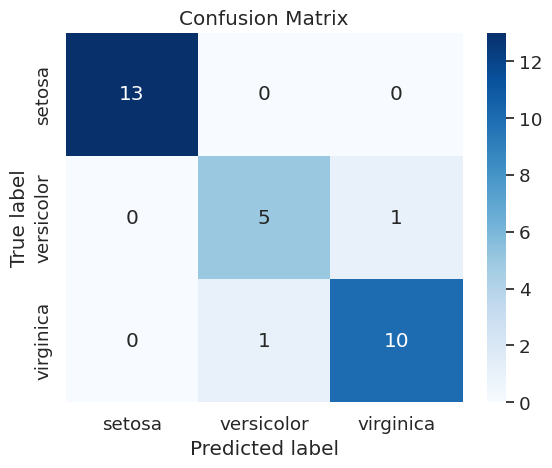

In [57]:
# Create a Seaborn heatmap for visualization
sns.set(font_scale=1.2)
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues', 
            xticklabels=df['species'].unique().tolist(), yticklabels=df['species'].unique().tolist())
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

> **Classification Report**

In [58]:

cr=classification_report(y_pred,y_test)
print(cr)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.83      0.83         6
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



> **Accuracy Score**

In [59]:
acc=accuracy_score(y_pred,y_test)
print(acc)

0.9333333333333333


> **ROC Curve**

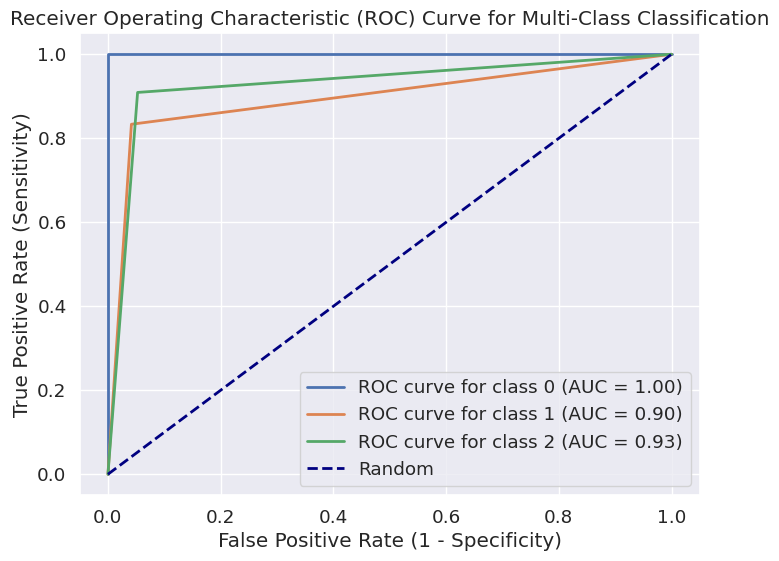

In [60]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from sklearn.multiclass import OneVsRestClassifier

# Assuming y_test and y_pred are arrays with multiple classes
# Convert them into binary format using label_binarize
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])  # Specify your class labels
y_pred_bin = label_binarize(y_pred, classes=[0, 1, 2])

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = y_test_bin.shape[1]

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_bin[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], lw=2, label=f'ROC curve for class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve for Multi-Class Classification')
plt.legend(loc='lower right')
plt.show()


# Improving Model Performance 

# Improving Model Accuracy

**Ensemble - VotingClassifier**

In [61]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Create individual classifiers
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_classifier = LogisticRegression(random_state=42)
svm_classifier = SVC(probability=True, random_state=42)
knn_classifier = KNeighborsClassifier()

# Create a list of tuples, where each tuple contains a name for the classifier and the classifier instance
classifiers = [('Random Forest', rf_classifier),
               ('Logistic Regression', logistic_classifier),
               ('SVM', svm_classifier),
               ('KNN', knn_classifier)]

# Create a VotingClassifier
voting_classifier = VotingClassifier(estimators=classifiers, voting='hard')  # You can use 'soft' for probabilities
#voting_classifier=VotingClassifier(estimators=classifiers, voting='soft')

# Now you can fit and use the voting_classifier as a regular classifier
voting_classifier.fit(X_train, y_train)
predictions = voting_classifier.predict(X_test)
print(accuracy_score(y_pred,y_test))

0.9333333333333333


# Improving Model Reliability

**Simple 5 cross  CV**

> *Cross-validation is a resampling procedure used to evaluate machine learning models by partitioning the dataset into multiple subsets, training the model on some subsets, and assessing its performance on the remaining subsets to obtain robust performance estimates.*

In [62]:
# Cross-validation 
svm_cv_scores = cross_val_score(svm_model, X_train, y_train, cv=5)
rf_cv_scores = cross_val_score(random_forest_model, X_train, y_train, cv=5)

print("\nCross-validation scores:")

print("SVM: ", svm_cv_scores)
print(f"Mean accuracy - SVM: {svm_cv_scores.mean():.2f}")

print("Random Forest: ", rf_cv_scores)
print(f"Mean accuracy - Random Forest: {rf_cv_scores.mean():.2f}")


Cross-validation scores:
SVM:  [1.         1.         0.95833333 1.         0.91666667]
Mean accuracy - SVM: 0.97
Random Forest:  [0.95833333 1.         0.83333333 1.         0.83333333]
Mean accuracy - Random Forest: 0.93


**Stratified KFold( Stratified 10 Cross Validation)**

> **Hyper Parameter (cv) Tuning**

> Hyperparameters are external configuration settings that are not learned from the data but are set before the training process begins. 

> Examples of hyperparameters include the learning rate, the number of hidden layers in a neural network, the number of trees in a random forest, or the regularization parameter in a support vector machine. 

> Hyperparameter tuning is the process of finding the optimal set of hyperparameters for a machine learning model.

> They can significantly impact the performance of the model.

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

# Create a RandomForestClassifier (replace this with your classifier of choice)
classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Create StratifiedKFold with c=10 folds
stratified_kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

# Perform stratified cross-validation
cv_results = cross_val_score(classifier, X, y, cv=stratified_kfold, scoring='accuracy')

# Print the results
print("Cross-validation results:")
print(cv_results)
print(f"Mean accuracy: {cv_results.mean():.2f}")

Cross-validation results:
[1.         1.         1.         0.93333333 0.86666667 0.93333333
 1.         1.         0.93333333 0.86666667]
Mean accuracy: 0.95


#  Improvement Model Efficiency

> **PCA (Principal Component Analysis)**

> *Achieve Computational Efficiency through Feature Reduction*

In [64]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [65]:
# Model building after PCA
svm_pca_model = SVC(kernel='linear', probability=True)
random_forest_pca_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit models after PCA
svm_pca_model.fit(X_train_pca, y_train)
random_forest_pca_model.fit(X_train_pca, y_train)

#Model Prediction
y_pred_svm=svm_model.predict(X_test)
y_pred_rf=random_forest_model.predict(X_test)

#Accuracy Score
acc_svm=accuracy_score(y_pred_svm,y_test)
print(f"SVM Accuracy {acc_svm:.2f}")
acc_rf=accuracy_score(y_pred_rf,y_test)
print('Random Forest Model Accuracy' , acc_rf)

SVM Accuracy 0.93
Random Forest Model Accuracy 0.9333333333333333


In [66]:
#Accuracy Score
acc_svm=accuracy_score(y_pred_svm,y_test)
print(f"SVM Accuracy {acc_svm:.2f}")
acc_rf=accuracy_score(y_pred_rf,y_test)
print('SVM Accuracy' , acc_rf)

SVM Accuracy 0.93
SVM Accuracy 0.9333333333333333


In [67]:

cr_svm=classification_report(y_pred_svm,y_test)
print(cr_svm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.83      0.83      0.83         6
           2       0.91      0.91      0.91        11

    accuracy                           0.93        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.93      0.93      0.93        30



In [68]:
cr_rfm=classification_report(y_pred_rf,y_test)
print(cr_rfm)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.75      0.86         8
           2       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.94      0.92      0.92        30
weighted avg       0.95      0.93      0.93        30



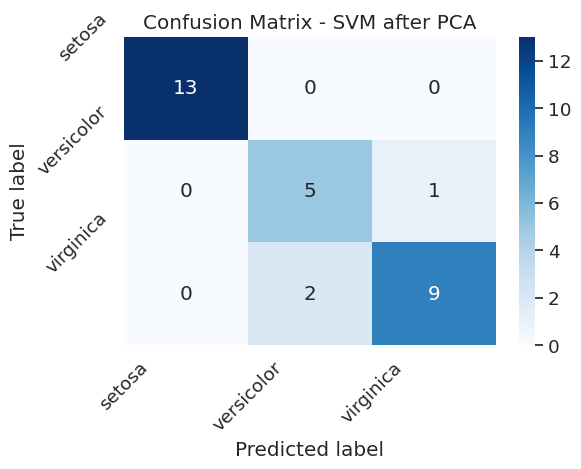

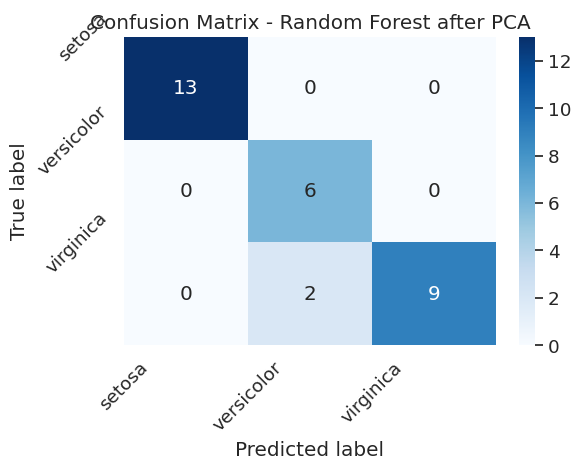

In [69]:

# Confusion Matrix
def plot_confusion_matrix(model, X_test, y_test, title):
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    #print(cm)
    plt.figure(figsize=(6, 4))
    #plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')

    plt.title(title)
    #plt.colorbar()

    classes = df['species'].unique().tolist()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes, rotation=45)

    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()

# Confusion Matrix for SVM after PCA
plot_confusion_matrix(svm_pca_model, X_test_pca, y_test, "Confusion Matrix - SVM after PCA")

# Confusion Matrix for Random Forest after PCA
plot_confusion_matrix(random_forest_pca_model, X_test_pca, y_test, "Confusion Matrix - Random Forest after PCA")

> **Cross Validation with PCA**

In [70]:
# Cross-validation 
svm_cv_scores = cross_val_score(svm_model, X_train_pca, y_train, cv=5)
rf_cv_scores = cross_val_score(random_forest_model, X_train_pca, y_train, cv=5)

print("\nCross-validation scores:")

print("SVM: ", svm_cv_scores)
print(f"Mean accuracy - SVM: {svm_cv_scores.mean():.2f}")

print("Random Forest: ", rf_cv_scores)
print(f"Mean accuracy - Random Forest: {rf_cv_scores.mean():.2f}")


Cross-validation scores:
SVM:  [1.         0.95833333 0.95833333 1.         0.91666667]
Mean accuracy - SVM: 0.97
Random Forest:  [0.95833333 1.         0.95833333 1.         0.875     ]
Mean accuracy - Random Forest: 0.96
